<a href="https://colab.research.google.com/github/Ajjukota/Diffusion_2d/blob/main/accuracies_with_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import librosa #Here we are using librosa library
from matplotlib import pyplot as plt

In [ ]:

eval_file = '/content/drive/MyDrive/datasets/AI_Research_Japanese/Code files/Evaluation sheet generation/short_native_char_eval_book.xlsx'

In [ ]:
df = pd.concat(pd.read_excel(eval_file, sheet_name=None), ignore_index=True)

In [ ]:
df

,Response_ID,Audio_ID,Character_ID,Character,Score
0,1.0,1.0,1.0,あ,1.0
1,1.0,2.0,1.0,あ,1.0
2,1.0,3.0,1.0,あ,1.0
3,1.0,4.0,1.0,あ,1.0
4,1.0,5.0,1.0,あ,1.0
...,...,...,...,...,...
547,46.0,8.0,46.0,ん,0.0
548,46.0,9.0,46.0,ん,0.0
549,46.0,10.0,46.0,ん,1.0
550,46.0,11.0,46.0,ん,0.0


In [ ]:
  df['relative_path'] = '/content/drive/MyDrive/datasets/AI_Research_Japanese/Code files/Model/46_basicsounds_natives/Response '+df['Response_ID'].astype(int).astype(str)+'/' + df['Audio_ID'].astype(int).astype(str) + '.wav'

In [ ]:
df1 = df[['relative_path', 'Character_ID','Score']]
df1.head()

,relative_path,Character_ID,Score
0,/content/drive/MyDrive/datasets/AI_Research_Ja...,1.0,1.0
1,/content/drive/MyDrive/datasets/AI_Research_Ja...,1.0,1.0
2,/content/drive/MyDrive/datasets/AI_Research_Ja...,1.0,1.0
3,/content/drive/MyDrive/datasets/AI_Research_Ja...,1.0,1.0
4,/content/drive/MyDrive/datasets/AI_Research_Ja...,1.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


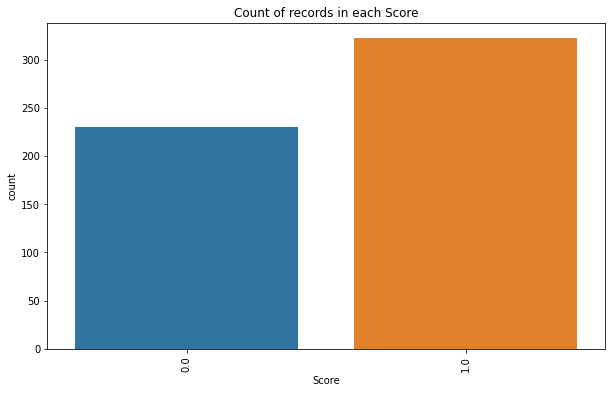

In [ ]:
df['Score'].value_counts()
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(df['Score'])
plt.title("Count of records in each Score")
plt.xticks(rotation="vertical")
plt.show()

#Data prerocessing

In [ ]:
#extracting feature from the audio signal
#-------------------------------------
# using librosa library
# 1. It tries to converge the signal into mono(one channel).
# 2. It can represent the audio signal between -1 to +1(in normalized form), so a regular pattern is observed.
# 3.It is also able to see the sample rate, and by default, it converts it to 22 kHz.
#----------------------------------------

In [ ]:
df1

,relative_path,Character_ID,Score
0,/content/drive/MyDrive/datasets/AI_Research_Ja...,1.0,1.0
1,/content/drive/MyDrive/datasets/AI_Research_Ja...,1.0,1.0
2,/content/drive/MyDrive/datasets/AI_Research_Ja...,1.0,1.0
3,/content/drive/MyDrive/datasets/AI_Research_Ja...,1.0,1.0
4,/content/drive/MyDrive/datasets/AI_Research_Ja...,1.0,1.0
...,...,...,...
547,/content/drive/MyDrive/datasets/AI_Research_Ja...,46.0,0.0
548,/content/drive/MyDrive/datasets/AI_Research_Ja...,46.0,0.0
549,/content/drive/MyDrive/datasets/AI_Research_Ja...,46.0,1.0
550,/content/drive/MyDrive/datasets/AI_Research_Ja...,46.0,0.0


In [ ]:
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

#Now we ned to extract the featured from all the audio files so we use tqdm
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(df1.iterrows()):
    file_name = os.path.join(os.path.abspath(str(row['relative_path'])))
    final_class_labels=row['Score']
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

552it [03:55,  2.35it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','Score'])
extracted_features_df.head() 

,feature,Score
0,"[-501.2, 45.154476, 7.6400466, 6.7139735, -3.0...",1.0
1,"[-465.85977, 22.831886, -13.754299, 7.2269287,...",1.0
2,"[-588.71564, 29.334414, 2.82515, 0.6567663, -3...",1.0
3,"[-505.7949, 11.12192, -4.7387986, 1.9972138, -...",1.0
4,"[-616.01483, 13.261228, -5.222661, -2.8067896,...",1.0


In [ ]:
extracted_features_df.shape

(552, 2)

In [ ]:
x=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['Score'].tolist())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
print(f'shape of x: {x.shape} and shape of y: {y.shape}')

shape of x: (552, 40) and shape of y: (552,)


#camparing models


In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# prepare configuration for cross validation test harness
seed = 7
# prepare models
CV_models = []
CV_models.append(('LR', LogisticRegression()))
CV_models.append(('KNN', KNeighborsRegressor(n_neighbors=2)))
CV_models.append(('CART', DecisionTreeRegressor(random_state=1)))
CV_models.append(('RF', RandomForestRegressor(n_estimators = 50, random_state = 2)))
CV_models.append(('SVM', SVR(kernel = 'rbf')))


In [ ]:
def model_accuracy(models):
    import warnings
    warnings.filterwarnings("ignore")
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
    	# kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
    	# cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    	# results.append(cv_results)

      model.fit(X_train,y_train)
      names.append(name)
      accuracy = model.score(X_test,y_test)
      results.append(accuracy)
      msg = f'{name}: {accuracy}'
      print(msg)
     
    # boxplot algorithm comparison


    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

# Algorithms based on Boosting

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

Bagging_models = []

Bagging_models.append(('BGR', BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))))
Bagging_models.append(('ADB', AdaBoostRegressor()))
Bagging_models.append(('GDB',GradientBoostingRegressor()))
Bagging_models.append(('XGB',xgb.XGBRegressor()))


LR: 0.9518072289156626
KNN: 0.6948529411764706
CART: 0.3274309723889556
RF: 0.7892417767106843
SVM: 0.3749000564472713


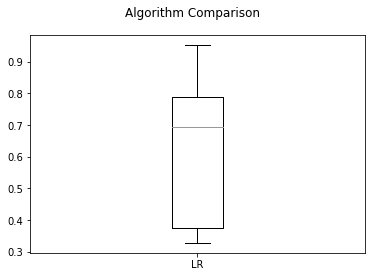

In [ ]:
model_accuracy(CV_models)

BGR: 0.715279111644658
ADB: 0.8072022203513382
GDB: 0.8102825749746239
[10:41:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB: 0.8063435888287889


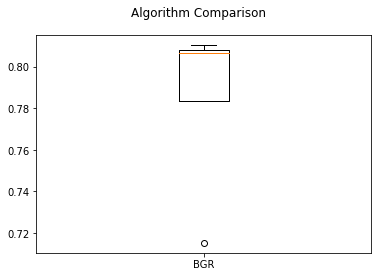

In [ ]:
model_accuracy(Bagging_models)